# HUMAN ANOMALY DETECTION IN SURVILLANCE VIDEOS VIA DEEP LEARNING

In [1]:
# import the necessary packages
import os
FIGHT_PATH = "D:/Abnormal_Activity_Detect_Surveillance_Videos/Train/Fighting"
ACC_PATH = "D:/Abnormal_Activity_Detect_Surveillance_Videos/Train/roadAccidents2"
SHOOT_PATH = "D:/Abnormal_Activity_Detect_Surveillance_Videos/Train/Shooting"
NORMAL_PATH = "D:/Abnormal_Activity_Detect_Surveillance_Videos/Train/Normal"
 
# initialize the class labels in the dataset
CLASSES = ["Normal", "Fighting", "Accident", "Shooting"]

In [2]:
# define the size of the training and testing split
TRAIN_SPLIT = 0.75
TEST_SPLIT = 0.25
 
# define the initial learning rate, batch size, and number of epochs
INIT_LR = 1e-2
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [3]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
#matplotlib.use("Agg")
 
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import sys

def load_dataset(datasetPath):
    # grab the paths to all images in our dataset directory, then
    # initialize our lists of images
    imagePaths = list(paths.list_images(datasetPath))
    data = []
    # loop over the image paths
    for imagePath in imagePaths:
        # load the image and resize it to be a fixed 128x128 pixels,
        # ignoring aspect ratio
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (128, 128))
        # add the image to the data lists
        data.append(image)
        # return the data list as a NumPy array
    return np.array(data, dtype="float32")

In [4]:
# load the images
print("[INFO] loading normal data...")
normalData = load_dataset(NORMAL_PATH)
print("[INFO] loading fight data...")
fightData = load_dataset(FIGHT_PATH)
print("[INFO] loading accident data...")
accidentData = load_dataset(ACC_PATH)
print("[INFO] loading shoot data...")
shootData = load_dataset(SHOOT_PATH)

[INFO] loading normal data...
[INFO] loading fire data...
[INFO] loading accident data...
[INFO] loading robbery data...


In [3]:
print(CLASSES)

['Normal', 'Fighting', 'Accident', 'Shooting']


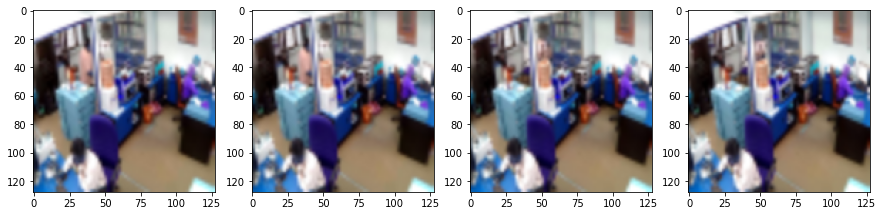

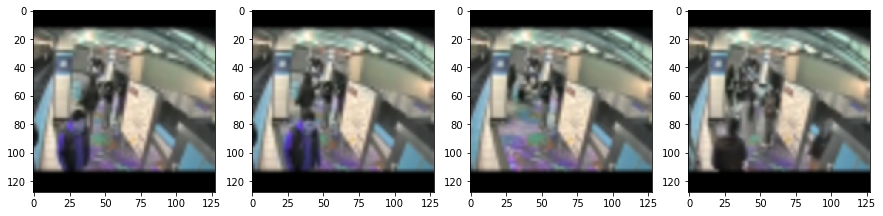

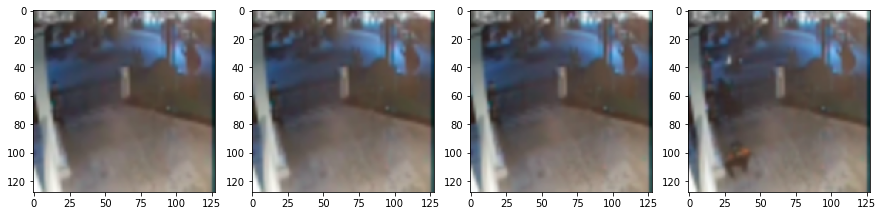

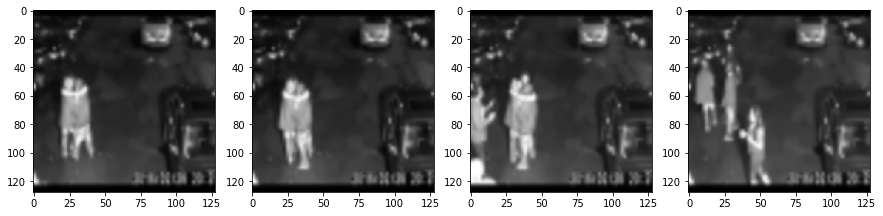

In [7]:
from tensorflow.keras.utils import img_to_array, array_to_img

fig, ax1 = plt.subplots(nrows = 1, ncols=4, figsize=(15,5))
for c, ax1 in zip(range(4), ax1): 
    ax1.grid(False)
    ax1.imshow(array_to_img(normalData[c]))
    
fig, ax2 = plt.subplots(nrows = 1, ncols=4, figsize=(15,5))
for c, ax2 in zip(range(4), ax2): 
    ax2.grid(False)
    ax2.imshow(array_to_img(fightData[c]))
    
fig, ax3 = plt.subplots(nrows = 1, ncols=4, figsize=(15,5))
for c, ax3 in zip(range(4), ax3): 
    ax3.grid(False)
    ax3.imshow(array_to_img(accidentData[c]))
    
fig, ax4 = plt.subplots(nrows = 1, ncols=4, figsize=(15,5))
for c, ax4 in zip(range(4), ax4): 
    ax4.grid(False)
    ax4.imshow(array_to_img(shootData[c]))
    
plt.show()

## DATA DISTRIBUTION 

<Figure size 432x288 with 0 Axes>

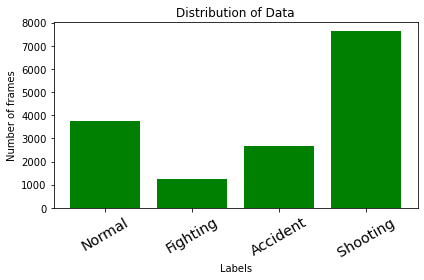

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
label = CLASSES
file_count = [normalData.shape[0],fightData.shape[0],accidentData.shape[0],shootData.shape[0]]
index=np.arange(len(label))
plt.bar(index,file_count,color="green")
plt.xlabel('Labels')
plt.ylabel('Number of frames')
plt.xticks(index,label,rotation=30,fontsize = 'x-large')
plt.title('Distribution of Data')
plt.tight_layout()
plt.savefig('train_data_distribution.pdf', format='pdf', dpi=1000)
#plt.style.use("ggplot")
plt.figure()

## DATA ANALYSIS

In [11]:
# construct the class labels for the data
normalLabels = np.zeros((normalData.shape[0],))
fightLabels = np.ones((fightData.shape[0],))
accidentLabels = np.full(accidentData.shape[0],2)
shootLabels = np.full(shootData.shape[0],3)
print("[INFO] Label created for all data...")
labels = np.hstack([normalLabels, fightLabels, accidentLabels, shootLabels])
labels = labels.astype(int)
# stack the fire data with the non-fire data
print("[INFO] stacking data...")
data = np.vstack([normalData, fightData, accidentData, shootData])
data /= 255    #scale the data to the range [0, 1]

[INFO] Label created for all data...
[INFO] stacking data...


In [12]:
data.shape

(15264, 128, 128, 3)

In [13]:
labels.shape

(15264,)

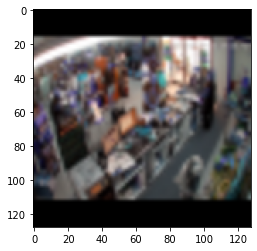

In [14]:
pic = data[1101]
plt.grid(False)
plt.imshow(pic)

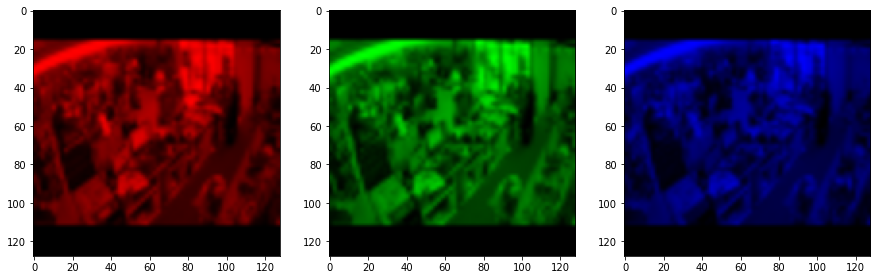

In [15]:
# display each channel
import numpy as np
#from keras.preprocessing.image import image
pic = data[1101]
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="float32") # 'dtype' by default: 'numpy.float64'
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    ax.grid(False)
    # display each channel
    ax.imshow(split_img)
plt.show()

In [16]:
classTotals = labels.sum(axis = 0)
classWeight = classTotals.max() / classTotals

## SPLITING TRAINING AND TESTING DATA

In [17]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size = TEST_SPLIT, random_state = 42)

In [18]:
trainX.shape

(11448, 128, 128, 3)

In [19]:
trainY.shape

(11448,)

In [20]:
testX.shape

(3816, 128, 128, 3)

In [21]:
testY.shape

(3816,)

## DATA AUGUMEMTATION

In [22]:
aug = ImageDataGenerator(rotation_range = 30,
                         zoom_range = 0.15,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         shear_range = 0.15,
                         horizontal_flip = True,
                         fill_mode = "nearest")

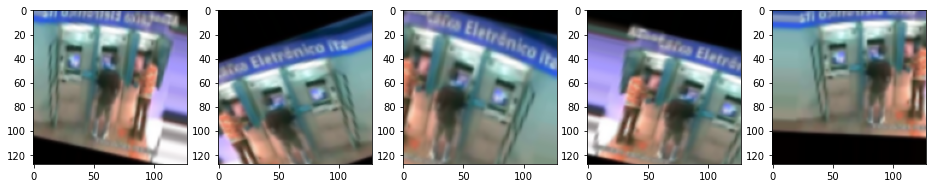

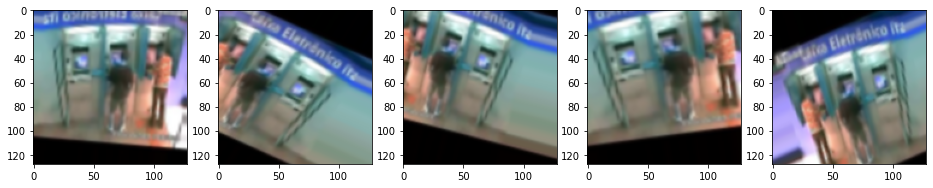

In [23]:
img_id = 113
cat_generator = aug.flow(trainX[img_id:img_id+1], trainY[img_id:img_id+1], batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax= plt.subplots(1,5, figsize=(16, 8))
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]
img_id = 113
cat_generator = aug.flow(trainX[img_id:img_id+1], trainY[img_id:img_id+1], batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax1= plt.subplots(1,5, figsize=(16, 8))
l = [ax1[i].imshow(cat[i][0][0]) for i in range(0,5)]

## MODEL BUILDING 

In [24]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
 
class AnamolyDetectionNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        
        # CONV => RELU => POOL
        model.add(SeparableConv2D(16, (7, 7), padding="same",input_shape=inputShape, activation="relu"))
        #model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        # CONV => RELU => POOL
        model.add(SeparableConv2D(32, (3, 3), padding="same",activation="relu"))
        #model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        # (CONV => RELU) * 2 => POOL
        model.add(SeparableConv2D(64, (3, 3), padding="same",activation="relu"))
        #model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(SeparableConv2D(64, (3, 3), padding="same",activation="relu"))
        #model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        # first set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(128))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        # second set of FC => RELU layers
        model.add(Dense(128))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        # return the constructed network architecture
        return model

In [25]:
model = AnamolyDetectionNet.build(width = 128, height= 128, depth = 3, classes = 4)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 128, 128, 16)     211       
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 64, 64, 32)       688       
 leConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       1

In [26]:
# initialize the optimizer and model(Stochastic gradient descent)
from tensorflow.keras.optimizers import legacy
opt = legacy.SGD(learning_rate = INIT_LR, momentum = 0.9, decay = INIT_LR / NUM_EPOCHS)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt, metrics =["accuracy"])
print("[INFO] compiling model...")

#Utilize callback to store the weights of the best model
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="D:/Abnormal_Activity_Detect_Surveillance_Videos/data4/best_weights_act_DWS.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=1)

[INFO] compiling model...


## MODEL TRAINING

In [27]:
# train the network
print("[INFO] training network...")
import datetime
tstart= datetime.datetime.now()

history = model.fit(aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
                    validation_data=(testX, testY),
                    validation_steps=len(testX) / BATCH_SIZE,
                    steps_per_epoch=len(trainX) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)

tend= datetime.datetime.now()
timeTaken = tend-tstart
print("time for training(ms):",int(timeTaken.total_seconds()*1000))


[INFO] training network...
Epoch 1/20
178/178 [==============================] - 128s 709ms/step - loss: 0.9843 - accuracy: 0.6522 - val_loss: 1.3761 - val_accuracy: 0.5930
Epoch 2/20
178/178 [==============================] - 126s 704ms/step - loss: 0.6281 - accuracy: 0.7710 - val_loss: 1.0113 - val_accuracy: 0.6617
Epoch 3/20
178/178 [==============================] - 125s 700ms/step - loss: 0.5128 - accuracy: 0.8163 - val_loss: 0.2690 - val_accuracy: 0.9072
Epoch 4/20
178/178 [==============================] - 133s 745ms/step - loss: 0.4226 - accuracy: 0.8527 - val_loss: 0.1914 - val_accuracy: 0.9389
Epoch 5/20
178/178 [==============================] - 138s 770ms/step - loss: 0.3526 - accuracy: 0.8795 - val_loss: 0.2055 - val_accuracy: 0.9334
Epoch 6/20
178/178 [==============================] - 129s 718ms/step - loss: 0.3071 - accuracy: 0.8979 - val_loss: 0.2624 - val_accuracy: 0.9195
Epoch 7/20
178/178 [==============================] - 124s 691ms/step - loss: 0.2759 - accuracy: 

In [28]:
Ttime=timeTaken
print("Time for 100 epochs:",
      Ttime.seconds//3600, "hours",
      (Ttime.seconds//60)%60,"minutes")

Time for 100 epochs: 0 hours 42 minutes


### Accuracy and Loss during Training and Validation

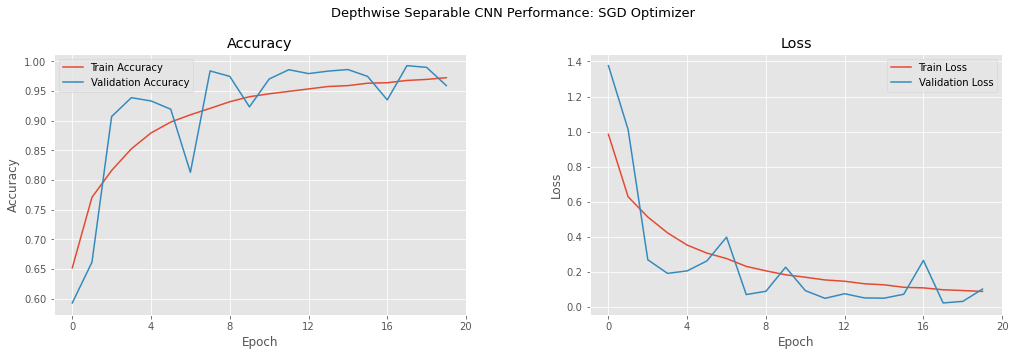

In [29]:
#Plotting Accuracy and Loss during training and validation
plt.style.use("ggplot")
N = np.arange(0, NUM_EPOCHS)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
t = f.suptitle('Depthwise Separable CNN Performance: SGD Optimizer', fontsize=13)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(N, history.history['accuracy'], label = 'Train Accuracy')
ax1.plot(N, history.history['val_accuracy'], label = 'Validation Accuracy')
ax1.set_xticks(np.arange(0, 21, 4))
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(N,history.history['loss'], label = 'Train Loss')
ax2.plot(N, history.history['val_loss'], label = 'Validation Loss')
ax2.set_xticks(np.arange(0, 21, 4))
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc = "best")

In [30]:
#Load our classifier with the weights of the best model
#model.load_weights('E:/chidanand/Abnormal_Activity_Detect_Surveillance_Videos/data/best_weights_act_DWS.hdf5')

#Saving the complete model
model.save('D:/Abnormal_Activity_Detect_Surveillance_Videos/data4/activity_detection_DWS.h5')

# serialize the model to disk
#print("[INFO] serializing network to '{}'...".format(MODEL_PATH))
#model.save(MODEL_PATH)

## TESTING AND EVALUATION

In [31]:
loss,acc = model.evaluate(testX,testY,verbose = 1)
print('Accuracy: %f'%(acc*100))

120/120 [==============================] - 13s 111ms/step - loss: 0.1017 - accuracy: 0.9594
Accuracy: 95.938158


In [32]:
# evaluate the network and show a classification report
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size = BATCH_SIZE)

print(classification_report(testY, 
                            predictions.argmax(axis = 1), 
                            target_names = CLASSES))

[INFO] evaluating network...
60/60 [==============================] - 14s 238ms/step
              precision    recall  f1-score   support

      Normal       0.98      0.91      0.95       951
    Fighting       0.93      0.97      0.95       308
    Accident       1.00      0.91      0.95       651
    Shooting       0.94      1.00      0.97      1906

    accuracy                           0.96      3816
   macro avg       0.96      0.95      0.95      3816
weighted avg       0.96      0.96      0.96      3816



<Figure size 432x288 with 0 Axes>

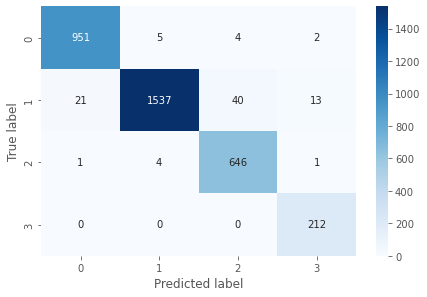

<Figure size 432x288 with 0 Axes>

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
con_mat = confusion_matrix(testY, predictions.argmax(axis = 1))
#print(con_mat)
figure = plt.figure()
sns.heatmap(con_mat, annot=True, cmap=plt.cm.Blues,fmt="d")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure()

## PREDICTION 

In [4]:
# import the necessary packages
from tensorflow.keras.models import load_model
from imutils import paths
import numpy as np
import imutils
import random
import cv2
import os
 
# load the trained model from disk
print("[INFO] loading model...")
model = load_model('D:/Abnormal_Activity_Detect_Surveillance_Videos/data4/activity_detection_DWS.h5')

[INFO] loading model...


### Prediction from Video Input

In [6]:
def predict(path):
    #Load video 
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, show, push_notebook
    import cv2
    import time
    output_notebook()

    cap = cv2.VideoCapture(path)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    frame = cv2.flip(frame, 0) # because Bokeh flips vertically
    width = frame.shape[1]
    height = frame.shape[0]
    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=700, height=400)
    myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
    label = []
    show(p, notebook_handle = True)

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            img = frame
            img = cv2.resize(img,(128, 128),interpolation=cv2.INTER_AREA)
            img = img.astype("float32") / 255.0
            preds = model.predict(np.expand_dims(img, axis=0))[0]
            j = np.argmax(preds)
            label = CLASSES[j]
            #print("Predicted Class : ",label)
            cv2.putText(frame, label, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,1.25, (0, 255, 0), 5)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
            frame = cv2.flip(frame, 0)
            myImage.data_source.data['image'] = [frame]
            push_notebook()
            if cv2.waitKey(1) & 0xFF == ord('q'): # press q to quit
                break
        else:
            break
        #time.sleep(0.2)
    cap.release()
    print('Detected Activity:', label)

In [7]:
predict(('D:/Abnormal_Activity_Detect_Surveillance_Videos/data4/video3.mp4'))

Loading BokehJS ...

1/1 [==============================] - 0s 40ms/step
Detected Activity: Accident


# Training with Adam Optimizer(TO IMPROVE PERFORMANCE)

In [36]:
model_1 = AnamolyDetectionNet.build(width = 128, height= 128, depth = 3, classes = 4)

In [37]:
from tensorflow.keras.optimizers import Adam
opt_1 = Adam()
model_1.compile(loss = "sparse_categorical_crossentropy", optimizer = opt_1, metrics =["accuracy"])
print("[INFO] compiling model...")

#Utilize callback to store the weights of the best model
from keras.callbacks import ModelCheckpoint


[INFO] compiling model...


In [38]:
# train the network
print("[INFO] training network...")
import datetime
tstart= datetime.datetime.now()
H1 = model_1.fit(aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
                    validation_data=(testX, testY),
                    validation_steps=len(testX) / BATCH_SIZE,
                    steps_per_epoch=len(trainX) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)
tend= datetime.datetime.now()
timeTaken = tend-tstart
print("time for training(ms):",int(timeTaken.total_seconds()*1000))

[INFO] training network...
Epoch 1/20
178/178 [==============================] - 130s 717ms/step - loss: 1.1049 - accuracy: 0.6228 - val_loss: 2.2098 - val_accuracy: 0.4974
Epoch 2/20
178/178 [==============================] - 121s 678ms/step - loss: 0.5991 - accuracy: 0.7950 - val_loss: 3.5860 - val_accuracy: 0.1861
Epoch 3/20
178/178 [==============================] - 119s 666ms/step - loss: 0.4035 - accuracy: 0.8634 - val_loss: 1.4239 - val_accuracy: 0.4961
Epoch 4/20
178/178 [==============================] - 130s 726ms/step - loss: 0.2795 - accuracy: 0.9057 - val_loss: 0.1586 - val_accuracy: 0.9476
Epoch 5/20
178/178 [==============================] - 125s 697ms/step - loss: 0.2126 - accuracy: 0.9268 - val_loss: 0.2158 - val_accuracy: 0.9248
Epoch 6/20
178/178 [==============================] - 123s 690ms/step - loss: 0.1861 - accuracy: 0.9376 - val_loss: 1.3369 - val_accuracy: 0.6544
Epoch 7/20
178/178 [==============================] - 120s 669ms/step - loss: 0.1576 - accuracy: 

In [39]:
Ttime=timeTaken
print("Time for 100 epochs:",
      Ttime.seconds//3600, "hours",
      (Ttime.seconds//60)%60,"minutes")

Time for 100 epochs: 0 hours 41 minutes


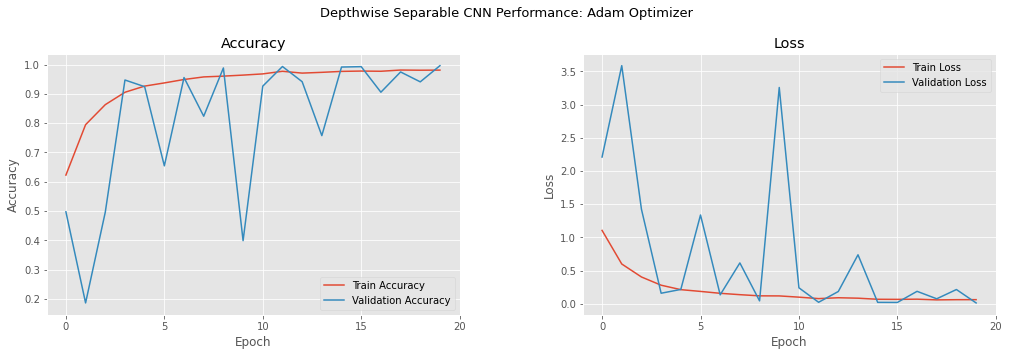

In [40]:
#Plotting Accuracy and Loss during training and validation
plt.style.use("ggplot")
N = np.arange(0, NUM_EPOCHS)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
t = f.suptitle('Depthwise Separable CNN Performance: Adam Optimizer', fontsize=13)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(N, H1.history['accuracy'], label = 'Train Accuracy')
ax1.plot(N, H1.history['val_accuracy'], label = 'Validation Accuracy')
ax1.set_xticks(np.arange(0, 21, 5))
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(N,H1.history['loss'], label = 'Train Loss')
ax2.plot(N, H1.history['val_loss'], label = 'Validation Loss')
ax2.set_xticks(np.arange(0, 21, 5))
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc = "best")

In [41]:
model_1.save('D:/Abnormal_Activity_Detect_Surveillance_Videos/data4/activity_detection_DWS_Adam.h5')

In [42]:
loss,acc = model_1.evaluate(testX,testY,verbose = 1)
print('Accuracy: %f'%(acc*100))

120/120 [==============================] - 10s 87ms/step - loss: 0.0125 - accuracy: 0.9966
Accuracy: 99.659330


In [43]:
print("[INFO] evaluating network...")
predictions = model_1.predict(testX, batch_size = BATCH_SIZE)

print(classification_report(testY, 
                            predictions.argmax(axis = 1), 
                            target_names = CLASSES))

[INFO] evaluating network...
60/60 [==============================] - 12s 202ms/step
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       951
    Fighting       1.00      0.99      1.00       308
    Accident       0.99      1.00      1.00       651
    Shooting       1.00      1.00      1.00      1906

    accuracy                           1.00      3816
   macro avg       1.00      1.00      1.00      3816
weighted avg       1.00      1.00      1.00      3816



<Figure size 432x288 with 0 Axes>

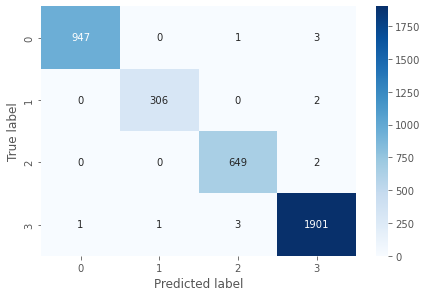

<Figure size 432x288 with 0 Axes>

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
con_mat = confusion_matrix(testY, predictions.argmax(axis = 1))
#print(con_mat)
figure = plt.figure()
sns.heatmap(con_mat, annot=True, cmap=plt.cm.Blues,fmt="d")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure()

# PREDICTION

In [8]:
from tensorflow.keras.models import load_model
from imutils import paths
import numpy as np
import imutils
import random
import cv2
import os
print("[INFO] loading model...")
model = load_model("D:/Abnormal_Activity_Detect_Surveillance_Videos/data4/activity_detection_DWS.h5")

[INFO] loading model...


1/1 [==============================] - 0s 169ms/step
Predicted Class: Normal
[INFO] Time for Prediction of a Single Frame: 225 ms


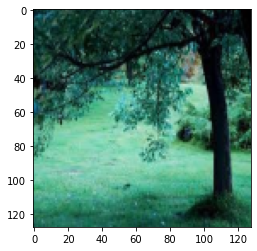

In [9]:
import matplotlib.pyplot as plt
import datetime
CLASSES = ["Normal", "Fighting", "Accident", "Shooting"]
imagePath= "D:/Abnormal_Activity_Detect_Surveillance_Videos/data4/nature.jpg"
image = cv2.imread(imagePath)
image = image.astype("float32") / 255.0
image = cv2.resize(image,(128, 128),interpolation=cv2.INTER_AREA)

t1= datetime.datetime.now()
preds = model.predict(np.expand_dims(image, axis=0))[0]
t2= datetime.datetime.now()

timeTaken = t2-t1
j = np.argmax(preds)
label = CLASSES[j]
plt.grid(False)
plt.imshow(image)
print("Predicted Class:",label)
print("[INFO] Time for Prediction of a Single Frame:",int(timeTaken.total_seconds()*1000),"ms")